In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from pandas_profiling import ProfileReport

In [3]:
car_mg = pd.read_csv("car-mpg.csv")

In [4]:
car_mg.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [5]:
car_mg.drop(["car_name"],axis=1,inplace=True)

In [6]:
car_mg["origin"] = car_mg["origin"].replace({1:"America",2:"Europe",3:"Asia"})

In [7]:
car_mg

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,America,0
1,15.0,8,350.0,165,3693,11.5,70,America,0
2,18.0,8,318.0,150,3436,11.0,70,America,0
3,16.0,8,304.0,150,3433,12.0,70,America,0
4,17.0,8,302.0,140,3449,10.5,70,America,0
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,America,1
394,44.0,4,97.0,52,2130,24.6,82,Europe,1
395,32.0,4,135.0,84,2295,11.6,82,America,1
396,28.0,4,120.0,79,2625,18.6,82,America,1


In [8]:
car_mg = pd.get_dummies(car_mg,columns=["origin"],prefix="origin")

In [9]:
car_mg.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_America,origin_Asia,origin_Europe
0,18.0,8,307.0,130,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,1,0,0


In [10]:
car_mg.dtypes

mpg               float64
cyl                 int64
disp              float64
hp                 object
wt                  int64
acc               float64
yr                  int64
car_type            int64
origin_America      uint8
origin_Asia         uint8
origin_Europe       uint8
dtype: object

In [11]:
car_mg.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0
origin_America,398.0,0.625628,0.484569,0.0,0.000,1.0,1.000,1.0
origin_Asia,398.0,0.198492,0.399367,0.0,0.000,0.0,0.000,1.0
origin_Europe,398.0,0.175879,0.381197,0.0,0.000,0.0,0.000,1.0


In [12]:
temp = pd.DataFrame(car_mg.hp.str.isdigit())

In [13]:
temp[temp['hp']==False]  #non digit value

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [14]:
car_mg.isnull().sum()

mpg               0
cyl               0
disp              0
hp                0
wt                0
acc               0
yr                0
car_type          0
origin_America    0
origin_Asia       0
origin_Europe     0
dtype: int64

In [15]:
car_mg[["hp"]].iloc[32,:]
#here we can see that in our data some diff notation avialable

hp    ?
Name: 32, dtype: object

In [16]:
car_mg = car_mg.replace("?",np.nan)

In [17]:
car_mg[car_mg.isnull().any(axis=1)]

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_America,origin_Asia,origin_Europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,0,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,1,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,1,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,1,0,0


In [18]:
car_mg.median()

mpg                 23.0
cyl                  4.0
disp               148.5
hp                  93.5
wt                2803.5
acc                 15.5
yr                  76.0
car_type             1.0
origin_America       1.0
origin_Asia          0.0
origin_Europe        0.0
dtype: float64

In [19]:
car_mg = car_mg.apply(lambda x:x.fillna(x.median(),axis=0))

In [20]:
car_mg.dtypes

mpg               float64
cyl                 int64
disp              float64
hp                 object
wt                  int64
acc               float64
yr                  int64
car_type            int64
origin_America      uint8
origin_Asia         uint8
origin_Europe       uint8
dtype: object

In [21]:
car_mg['hp'] = car_mg['hp'].astype('float64')

In [22]:
car_mg.dtypes

mpg               float64
cyl                 int64
disp              float64
hp                float64
wt                  int64
acc               float64
yr                  int64
car_type            int64
origin_America      uint8
origin_Asia         uint8
origin_Europe       uint8
dtype: object

In [23]:
car_mg.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0
origin_America,398.0,0.625628,0.484569,0.0,0.000,1.0,1.000,1.0
origin_Asia,398.0,0.198492,0.399367,0.0,0.000,0.0,0.000,1.0


In [24]:
car_mg_attr = car_mg.iloc[:,0:10]   #except last column for multicolinearity purpose

In [25]:
car_mg_attr.corr()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_America,origin_Asia
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.759207,-0.568192,0.442174
cyl,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.912577,0.604351,-0.396479
disp,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.855141,0.651407,-0.433505
hp,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.701399,0.485418,-0.318972
wt,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.815445,0.598398,-0.440817
acc,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.385187,-0.250806,0.109144
yr,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.305194,-0.139883,0.193101
car_type,0.759207,-0.912577,-0.855141,-0.701399,-0.815445,0.385187,0.305194,1.000000,-0.624215,0.392758
origin_America,-0.568192,0.604351,0.651407,0.485418,0.598398,-0.250806,-0.139883,-0.624215,1.000000,-0.643317
origin_Asia,0.442174,-0.396479,-0.433505,-0.318972,-0.440817,0.109144,0.193101,0.392758,-0.643317,1.000000


<AxesSubplot:>

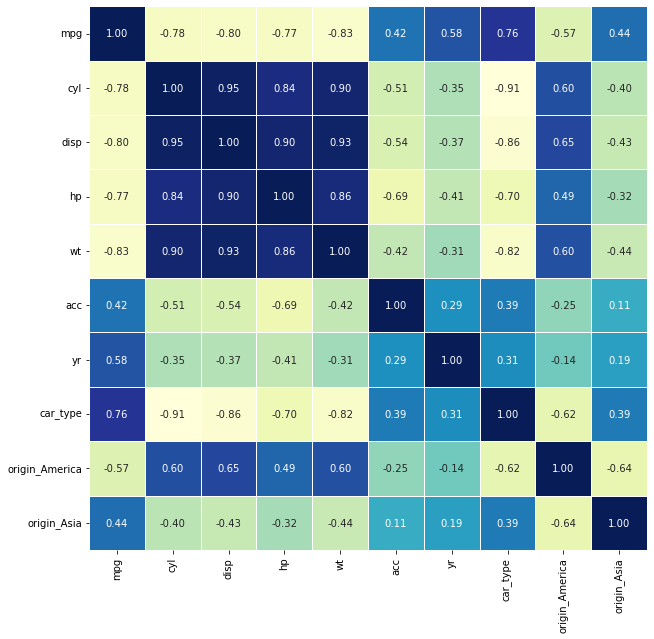

In [26]:
#correlation plot
plt.figure(figsize=(10,10))
sns.heatmap(data=car_mg_attr.corr(),annot=True,fmt=".2f",cbar=False,cmap="YlGnBu",linewidths=1)

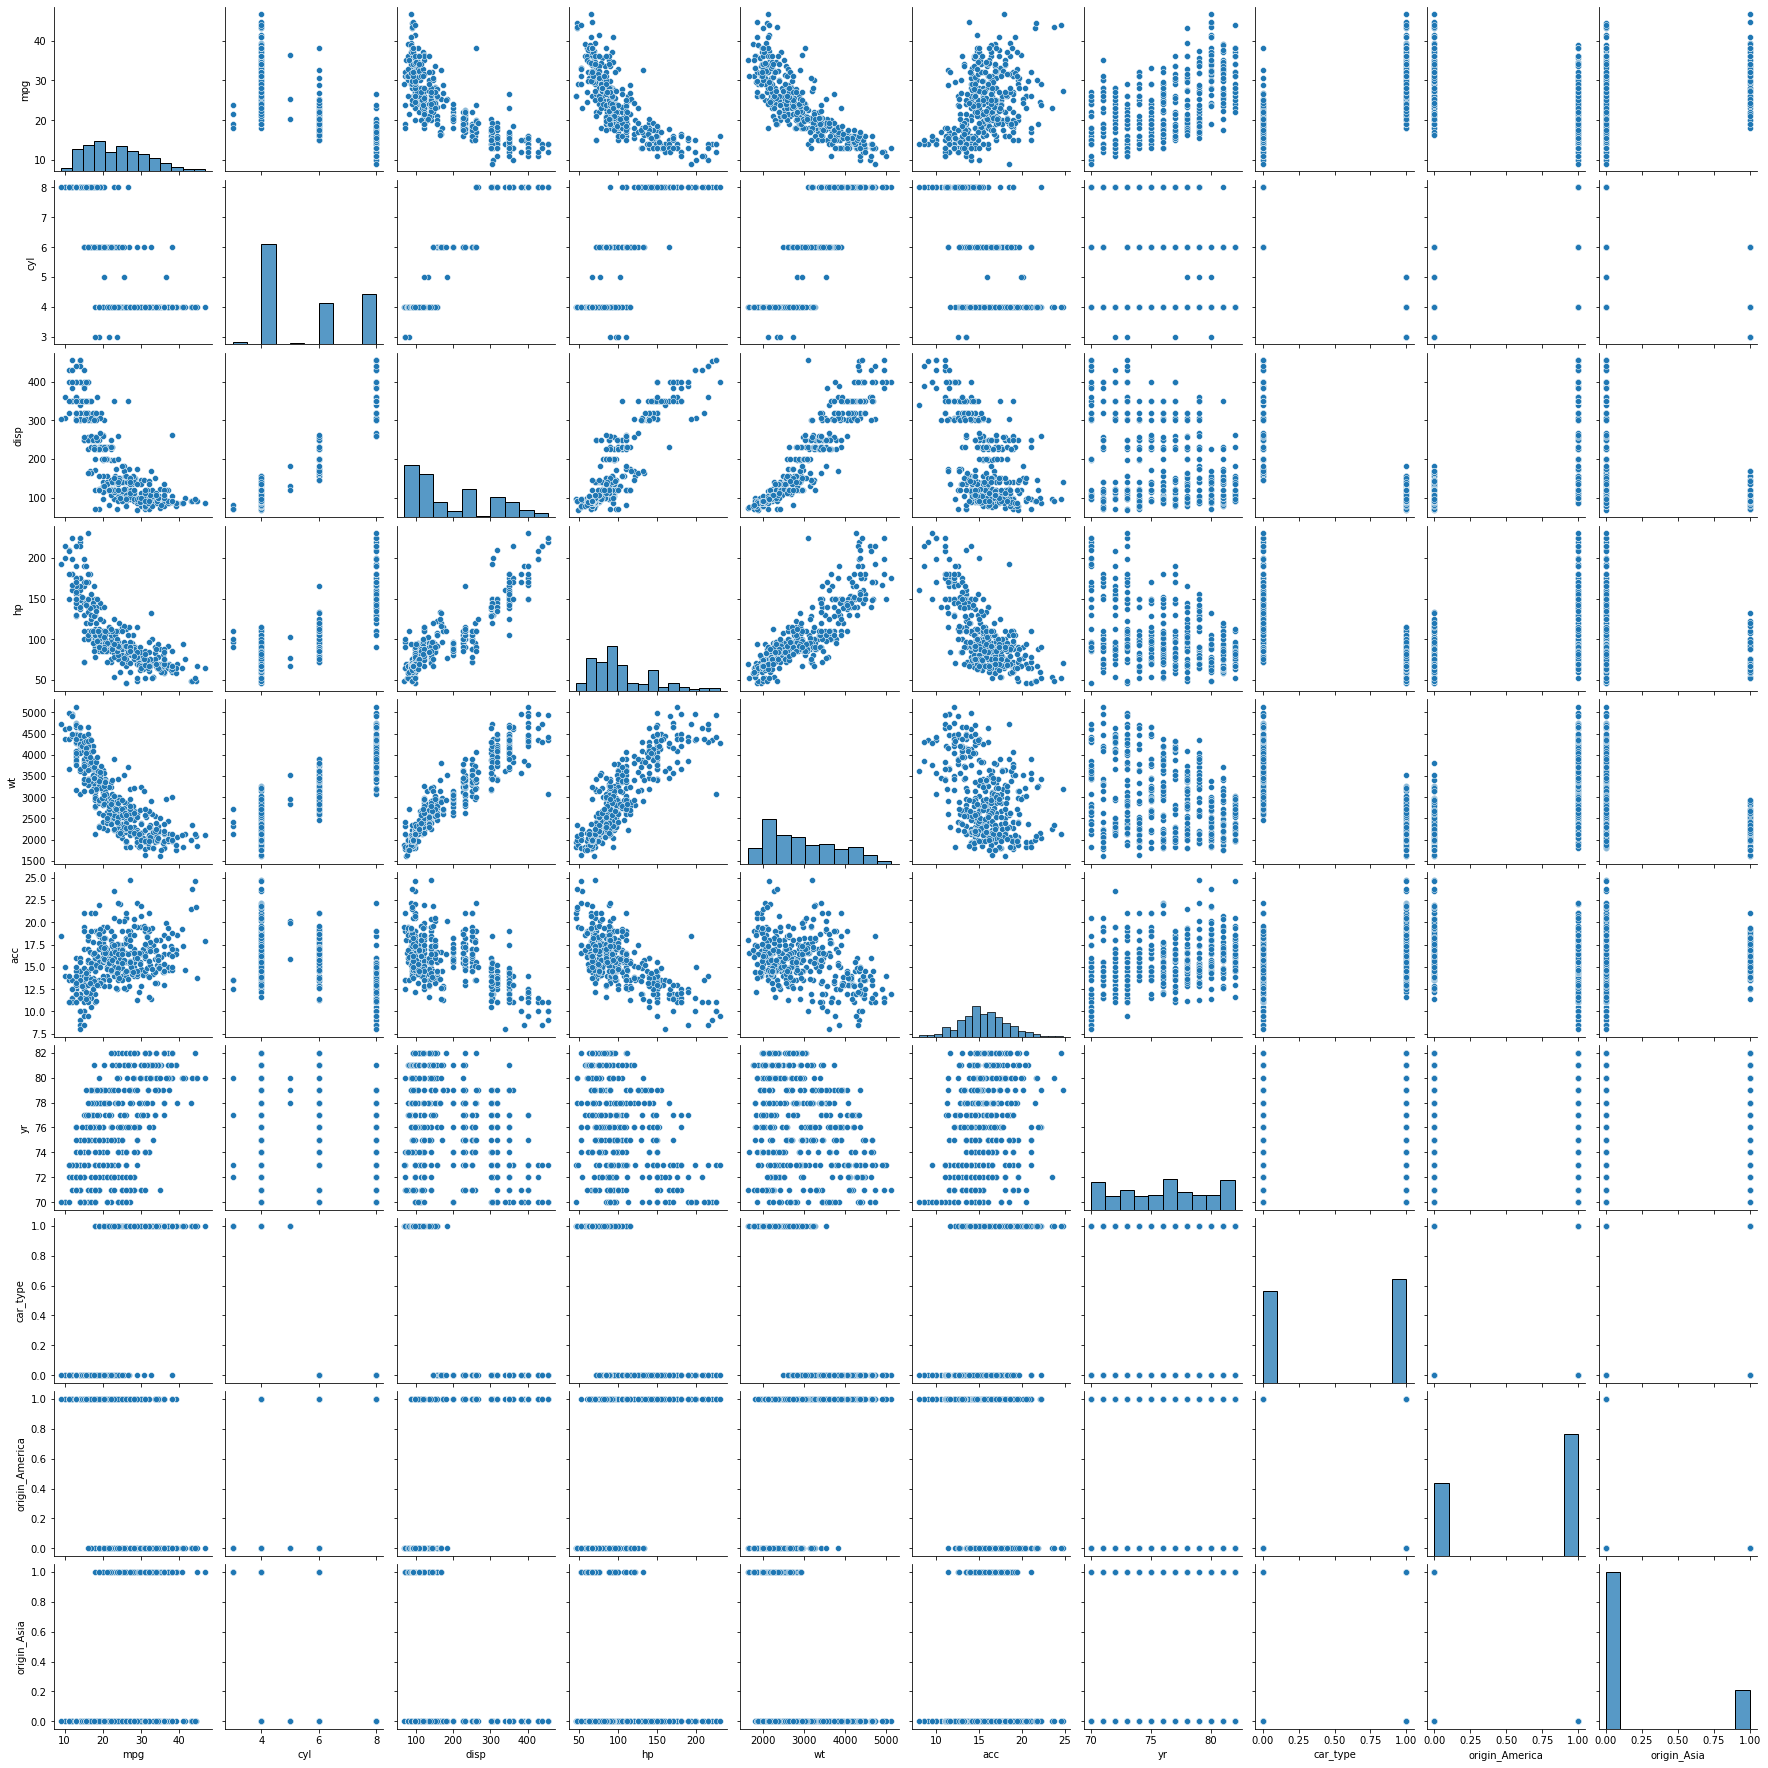

In [27]:
#pair plot
sns.pairplot(car_mg_attr)

In [28]:
car_mg.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'car_type',
       'origin_America', 'origin_Asia', 'origin_Europe'],
      dtype='object')

In [29]:
x = car_mg.drop("mpg",axis=1)
x  = x.drop(['origin_America','origin_Asia', 'origin_Europe'],axis=1)
y = car_mg[["mpg"]]

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1)

In [31]:
from sklearn.linear_model import LinearRegression
linear_regr = LinearRegression()
linear_regr.fit(x_train,y_train)

LinearRegression()

In [32]:
linear_regr.coef_[0]

array([ 1.86371783e+00,  1.00660508e-02, -3.92290063e-02, -6.41499653e-03,
        1.17238095e-02,  7.58818485e-01,  6.62652134e+00])

In [33]:
for idx,col_name in enumerate(x_train.columns):
    print("The Coefficiant for {} is {}".format(col_name,linear_regr.coef_[0][idx]))

The Coefficiant for cyl is 1.863717833626987
The Coefficiant for disp is 0.010066050755003095
The Coefficiant for hp is -0.03922900629589667
The Coefficiant for wt is -0.006414996525192761
The Coefficiant for acc is 0.011723809488669147
The Coefficiant for yr is 0.7588184849759363
The Coefficiant for car_type is 6.626521339249245


In [38]:
y_pred  = linear_regr.predict(x_train)

In [45]:
y_pred1 = linear_regr.predict(x_test)

In [34]:
#intercept value
intercept = linear_regr.intercept_[0]
print("The Intercept for our model is ",intercept)

The Intercept for our model is  -26.69336012583209


In [35]:
#R^2 for training data
linear_regr.score(x_train,y_train)

0.8258091181337589

In [36]:
#R^2 for test data
linear_regr.score(x_test,y_test)

0.8404952015294239

In [43]:
from sklearn.gaussian_process.kernels import Sum

# compute with formulas from the theory
SS_Residual = np.sum((y_train - y_pred)**2)       

SS_Total = np.sum((y_train-np.mean(y_train))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total

adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
print(r_squared)
print(adjusted_r_squared)

mpg    0.825809
dtype: float64
mpg    0.821293
dtype: float64


In [46]:
# compute Adjusted R^2 for test data
SS_Residual = np.sum((y_test - y_pred1)**2)       

SS_Total = np.sum((y_test-np.mean(y_test))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total

adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(r_squared)
print(adjusted_r_squared)

mpg    0.840495
dtype: float64
mpg    0.830526
dtype: float64


#>>>>>>>>>>>>>>>>>>Transformation>>>>>>>>>>>>>>

In [ ]:
from scipy.stats import zscore
x_train_scaled = x_train.apply(zscore)
#y_train_scaled = y_train.apply(zscore)
x_test_scaled = x_test.apply(zscore)
#y_test_scaled = y_test.apply(zscore)

In [ ]:
linear_regr.fit(x_train_scaled,y_train)

LinearRegression()

In [ ]:
for idx,col_name in enumerate(x_train_scaled.columns):
    print("The Coefficiant for {} is {}".format(col_name,linear_regr.coef_[0][idx]))

The Coefficiant for cyl is 3.115545441828817
The Coefficiant for disp is 1.0279366640093925
The Coefficiant for hp is -1.4725389479938948
The Coefficiant for wt is -5.417525355429162
The Coefficiant for acc is 0.03251741731761951
The Coefficiant for yr is 2.7997026959113294
The Coefficiant for car_type is 3.3046752989818082


In [ ]:
linear_regr.intercept_

array([23.60071942])

In [ ]:
linear_regr.score(x_train_scaled,y_train)


0.825809118133759

In [ ]:
linear_regr.score(x_test_scaled,y_test)


0.8437193390169955

In [ ]:
  #Mean Squared Error
  MSE = np.mean((linear_regr.predict(x_test_scaled)-y_test)**2)

In [ ]:
math.sqrt(MSE)

3.022788826451731

In [ ]:
y_pred = linear_regr.predict(x_test_scaled)

In [ ]:
from sklearn.gaussian_process.kernels import Sum

# compute with formulas from the theory
SS_Residual = np.sum((y - y_pred)**2)       

SS_Total = np.sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total

adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(r_squared, adjusted_r_squared)


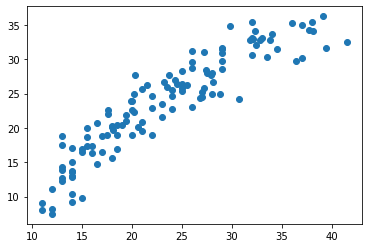

In [ ]:
plt.scatter(y_test['mpg'],y_pred)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(x.values,ix) for ix in range(x.shape[1])]

In [ ]:
variance_inflation_factor(x.values,1)  #vif for second column

87.05808335183303

In [ ]:
#variation Iflation factor
i = 0
for col in x.columns:
    if i<11:
        print(col,"------->",vif[i] )
        i = i+1

cyl -------> 172.09167529137474
disp -------> 87.05808335183303
hp -------> 71.23983108333236
wt -------> 139.1665144189037
acc -------> 69.82068667385671
yr -------> 166.95012233353933
car_type -------> 12.993508077923245


Using Statsmodel Library to get R type outputs ##

In [ ]:
#R^2 is not a reilable metric as it always increases with addition of more attributes even if the attributes have no
# influence on the predicted variable.instead we use adjuested R^2 which removes the statstical chance that improves R^2

In [ ]:
data_train = pd.concat([x_train,y_train],axis=1)

In [ ]:
data_train.head()

,cyl,disp,hp,wt,acc,yr,car_type,mpg
350,4,105.0,63.0,2215,14.9,81,1,34.7
59,4,97.0,54.0,2254,23.5,72,1,23.0
120,4,121.0,112.0,2868,15.5,73,1,19.0
12,8,400.0,150.0,3761,9.5,70,0,15.0
349,4,91.0,68.0,1985,16.0,81,1,34.1


In [ ]:
import statsmodels.formula.api as smf
#smf-stat smodel functiomn
lm1 = smf.ols(formula='mpg ~ cyl+disp+hp+wt+acc+yr+car_type',data=data_train).fit()
lm1.params

Intercept   -26.693360
cyl           1.863718
disp          0.010066
hp           -0.039229
wt           -0.006415
acc           0.011724
yr            0.758818
car_type      6.626521
dtype: float64

In [ ]:
print(lm1.summary())   #inferential statistics

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     182.9
Date:                Fri, 06 May 2022   Prob (F-statistic):           1.41e-98
Time:                        14:30:53   Log-Likelihood:                -725.17
No. Observations:                 278   AIC:                             1466.
Df Residuals:                     270   BIC:                             1495.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -26.6934      5.597     -4.769      0.0